# Optimization with Inequality Constraints

Next, consider a minimization problem with several constraints (namely Example 16.4 from [Nocedal2006]). The objective function is

$$ f(x) = (x_1 - 1)^2 + (x_2 - 2.5)^2 $$

and the five inequality constraints are

$$
\begin{align}
	x_1 - 2 x_2 + 2 & \ge 0 
	\\
    -x_1 -2x_2 + 6  & \ge 0
    \\
     -x_1 +2x_2 + 2  & \ge 0
    \\
     x_1 & \ge 0
	\\
    x_2 & \ge 0.
\end{align}
$$

Since this is a quadratic problem with linear constraints, we will use a Sequential Least Squares Programming (SLSQP) method.

The *objective* function is

In [1]:
from scipy.optimize import minimize 

obj_fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

The first three constraints are defined by

In [2]:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

Finally, the positivity of the two variables, $x_1$ and $x_2,$  is imposed using bounds.

In [3]:
bnds = ((0, None), (0, None))

Now the  optimization problem is solved using the SLSQP method.

In [4]:
res = minimize(obj_fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)

In [5]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

We have indeed converged to the theoretical solution $(1.4 ,1.7).$

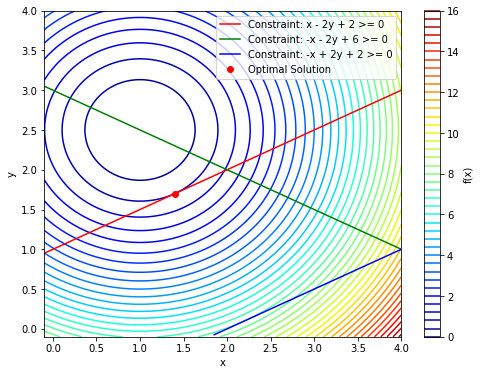

Optimal solution: [1.4 1.7]
Optimal value: 0.8000000011920985


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points for plotting
x = np.linspace(-.1, 4, 400)
y = np.linspace(-.1, 4, 400)
X, Y = np.meshgrid(x, y)

# Calculate the objective function values at each point on the grid
Z = (X-1.)**2 + (Y-2.5)**2

# Plot the contour plot of f(x)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.colorbar(label='f(x)')
# Plot the constraint x - 2y + 2 > 0
plt.plot(x, 1 + 0.5*x, 'r', label='Constraint: x - 2y + 2 >= 0')
# Plot the constraint -x - 2y + 6 > 0
plt.plot(x, 3 - 0.5*x, 'g', label='Constraint: -x - 2y + 6 >= 0')
# Plot the constraint -x + 2y + 2 > 0
plt.plot(x[190:], -1 + 0.5*x[190:], 'b', label='Constraint: -x + 2y + 2 >= 0')
# Mark the optimal solution
plt.plot(res.x[0], res.x[1], 'ro', label='Optimal Solution')
#
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
optimal_x = res.x
print("Optimal solution:", optimal_x)
print("Optimal value:", obj_fun(optimal_x))